In [405]:
# Importa as bibliotecas

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score
from sklearn import tree
import matplotlib.pyplot as plt
import seaborn as sns

In [420]:
dados = pd.read_csv("dados_produtos.csv",sep=',') #Importa o csv com os Dados

In [361]:
dados.describe() # Mostra informações estatisticas do Dataframe

,rating,rating_count,purchased
count,100.000000,100.000000,100.00
mean,4.056900,2536.670000,0.55
std,0.588344,1458.312544,0.50
min,3.020000,10.000000,0.00
25%,3.580000,1433.250000,0.00
50%,4.105000,2424.000000,1.00
75%,4.505000,3773.000000,1.00
max,5.000000,4977.000000,1.00


In [362]:
dados.info() # Mostra a informações sobre o arquivo do Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   product_name  100 non-null    object 
 1   rating        100 non-null    float64
 2   rating_count  100 non-null    int64  
 3   purchased     100 non-null    int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 3.3+ KB


In [363]:
dados.head(10) # Demonstra os primeiros itens do Dataframe

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,1
1,Celular,3.46,3872,0
2,Cafeteira,3.25,1187,0
3,Televisão,3.77,4097,1
4,Videogame,5.00,4738,1
5,Celular,3.98,1413,0
6,iPod,3.50,1907,0
7,Notebook,4.76,3857,0
8,Videogame,3.94,2800,1
9,Televisão,4.68,2600,0


c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Boxplot Relação entre avaliação e venda')

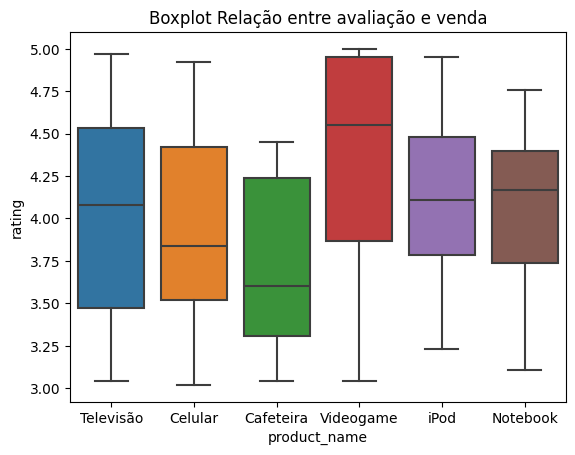

In [364]:
sns.boxplot(x=dados['product_name'],y=dados['rating']) # Cria o boxplot do Dataframe usando as counas "product_name" e "rating"
plt.title("Boxplot Relação entre avaliação e venda") # Adiciona um titulo para o Boxplot


In [365]:
# Preenche os possiveis espaçoes vazios do dataframe
dados = dados.replace('',np.nan)

In [366]:

# Soma todos os valores nulos em cada coluna
print(dados.isnull().sum())

product_name    0
rating          0
rating_count    0
purchased       0
dtype: int64


DIVISÃO DOS DADOS EM TESTE E TREINAMENTO

In [421]:
# Trocando os dados da coluna "purchased" de bool para String
dados["purchased"] = dados["purchased"].map({0:"Não Comprou",1:"Comprou"})

In [422]:
dados.head(5)

,product_name,rating,rating_count,purchased
0,Televisão,3.04,29,Comprou
1,Celular,3.46,3872,Não Comprou
2,Cafeteira,3.25,1187,Não Comprou
3,Televisão,3.77,4097,Comprou
4,Videogame,5.00,4738,Comprou


In [368]:
# Transformando as colunas do dataframe em arrays para fazer a separação dos conjuntos de teste e treino
rating = np.array(dados["rating"])
purchased = np.array(dados["purchased"])
print(len(purchased),len(rating))

100 100


In [369]:
# Realizando a separação propriamente dita
rating_test, rating_treino, purchased_test, purchased_treino = train_test_split(rating.reshape(-1,1),purchased.reshape(-1,1), 
                                                                        test_size=0.2, random_state=42)

In [370]:
#Criando modelo de arvore de decisão
modelo = DecisionTreeClassifier()
modelo.fit(rating_treino,purchased_treino)

DecisionTreeClassifier()

[Text(0.6, 0.9285714285714286, '3.04 <= 4.44\ngini = 0.375\nsamples = 20\nvalue = [15, 5]\nclass = Comprou'),
 Text(0.5, 0.7857142857142857, '3.04 <= 4.0\ngini = 0.43\nsamples = 16\nvalue = [11, 5]\nclass = Comprou'),
 Text(0.3, 0.6428571428571429, '3.04 <= 3.21\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = Comprou'),
 Text(0.2, 0.5, '3.04 <= 3.03\ngini = 0.444\nsamples = 3\nvalue = [2, 1]\nclass = Comprou'),
 Text(0.1, 0.35714285714285715, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = Comprou'),
 Text(0.3, 0.35714285714285715, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = Comprou'),
 Text(0.4, 0.5, 'gini = 0.0\nsamples = 5\nvalue = [5, 0]\nclass = Comprou'),
 Text(0.7, 0.6428571428571429, '3.04 <= 4.15\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = Comprou'),
 Text(0.6, 0.5, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]\nclass = Não comprou'),
 Text(0.8, 0.5, '3.04 <= 4.425\ngini = 0.444\nsamples = 6\nvalue = [4, 2]\nclass = Comprou'),
 Text(0.7, 0.35714285714285715, '3.04

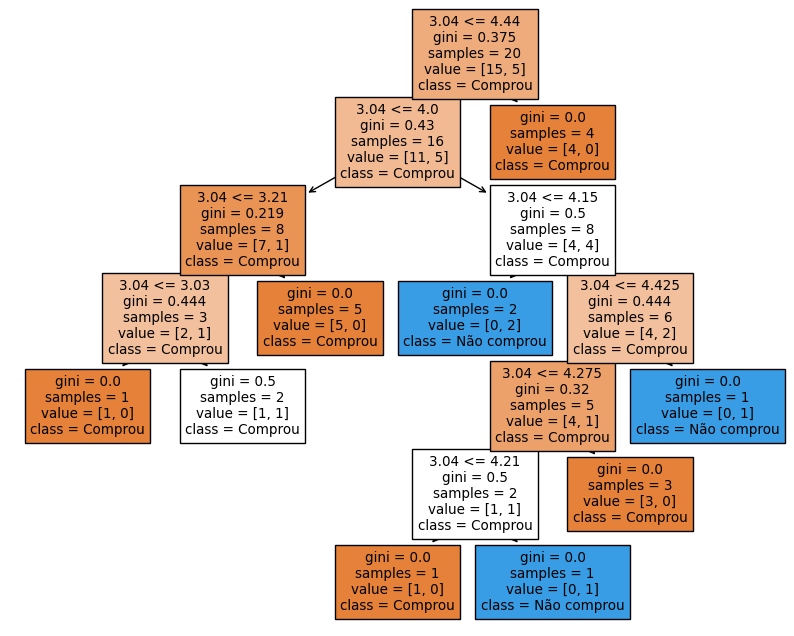

In [423]:
# criação e plot da arvore de decisão
fig = plt.figure(figsize=(10,8))
tree.plot_tree(modelo,feature_names= rating.tolist(), class_names = purchased.tolist(), filled= True)

In [372]:
# Realizando revisão e printando 5 exemplares
previsoes = modelo.predict(rating_test)
for i in range(5):
    print(previsoes[i])
    i+=1

Não comprou
Comprou
Comprou
Comprou
Não comprou


In [385]:
# Teste da Acuracia do modelo
acuracy = accuracy_score(purchased_test,previsoes)
confusion = confusion_matrix(previsoes, purchased_test)
print("Acuracy:",acuracy)
print("Recall:",confusion)
pressFin = confusion[1][1]/(confusion[1][1] + confusion[0][1])
print("Precision:", pressFin)

Acuracy: 0.575
Recall: [[38 32]
 [ 2  8]]
Precision: 0.2
